In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataPDG = pd.read_csv('../Data/cross-section_pbar_d_PDG.csv', sep=',', comment='#')
dataPDG.columns

Index(['POINT_NUMBER', 'PLAB(GEV/C)', 'PLAB_MIN', 'PLAB_MAX', 'SIG(MB)',
       'STA_ERR+', 'STA_ERR-', 'SY_ER+(PCT)', 'SY_ER-(PCT)', 'REFERENCE FLAG'],
      dtype='object')

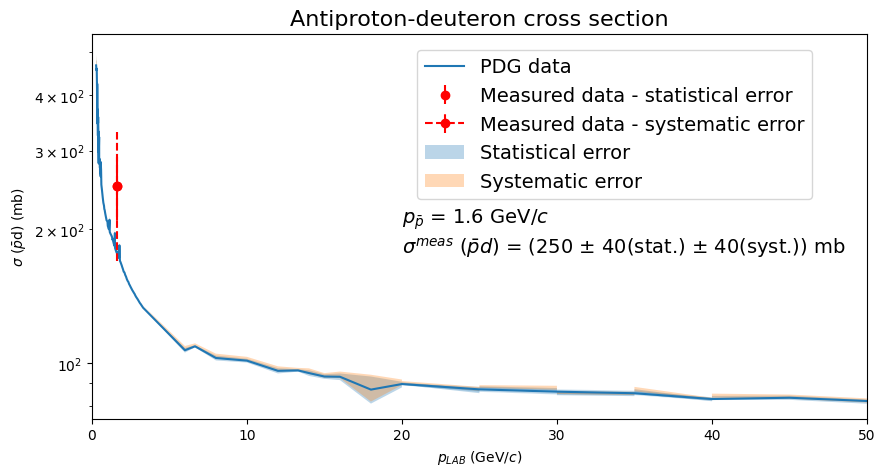

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=dataPDG, x='PLAB(GEV/C)', y='SIG(MB)', ax=ax, label='PDG data')

# Plotting statistical errors as bands
stat_band = ax.fill_between(dataPDG['PLAB(GEV/C)'], 
                             dataPDG['SIG(MB)'] - dataPDG['STA_ERR-'],
                             dataPDG['SIG(MB)'] + dataPDG['STA_ERR+'],
                             alpha=0.3, label='Statistical error')  # Adjust the alpha value for transparency

# Plotting systematic errors as bands, extending from the statistical error band
sys_band = ax.fill_between(dataPDG['PLAB(GEV/C)'], 
                            dataPDG['SIG(MB)'] - (dataPDG['STA_ERR-'] - dataPDG['SY_ER-(PCT)']*dataPDG['SIG(MB)']*0.01),
                            dataPDG['SIG(MB)'] + (dataPDG['STA_ERR+'] + dataPDG['SY_ER+(PCT)']*dataPDG['SIG(MB)']*0.01),
                            alpha=0.3, label='Systematic error')  # Adjust the alpha value for transparency

ax.set_title('Antiproton-deuteron cross section', fontsize=16)
ax.set_xlabel('$\it{p}$$_{LAB}$ (GeV/$\it{c}$)')
ax.set_ylabel(r'$\sigma$ ($\bar{p}$d) (mb)')
ax.set_xlim(0, 50)
ax.set_ylim(75, 550)
ax.set_yscale('log')

# add a point for measured data
p = 1.6             # GeV/c
sigma = 250         # mb
err_sigma = 40      # mb
err_sigma_syst = 40 # mb
# draw the point with both error sigma snd error sigma_syst
ax.errorbar(p, sigma, yerr=err_sigma, fmt='o', color='red', label='Measured data - statistical error')
a = ax.errorbar(p, sigma, yerr=(err_sigma+err_sigma_syst), fmt='o', color='red', ls='dashed', label='Measured data - systematic error')
a[-1][0].set_linestyle('dashed')


# add a legend
handles, labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[3], a, handles[1], handles[2]]
labels = [labels[0], labels[3], 'Measured data - systematic error', labels[1], labels[2]]
ax.legend(handles, labels, loc=(0.42, 0.57), fontsize=14)

# add a text box
textstr = '\n'.join((
    r'$\it{p}_\bar{p}$ = %.1f GeV/$\it{c}$' % (p, ),
    r'$\sigma^{meas}$ ($\bar{p}d$) = (%.0f $\pm$ %.0f(stat.) $\pm$ 40(syst.)) mb' % (sigma, err_sigma)))
ax.text(0.4, 0.55, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top')

plt.savefig('../Data/cross-section_pbar_d_PDG.pdf')
plt.show()